# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv('drive/MyDrive/airbnb_listings.csv', index_col=0)

<ipython-input-24-25e35331674a>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [25]:
# Q1
pd.set_option('display.max_columns', None) # 항상 모두 출력
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [26]:
# Q2
df.isnull().sum()

id                                      0
host_response_time                  19006
host_response_rate                  19006
host_acceptance_rate                14015
host_is_superhost                       5
host_listings_count                     5
host_total_listings_count               5
host_verifications                      0
host_has_profile_pic                    5
host_identity_verified                  5
neighborhood                            0
latitude                                0
longitude                               0
is_location_exact                       0
property_type                           0
room_type                               0
accommodates                            0
bathrooms                              54
bedrooms                               77
beds                                  482
bed_type                                0
amenities                               0
square_feet                         50407
price                             

In [27]:
#Q2
missing_data = df.isnull().sum() / len(df) * 100

df1 = pd.DataFrame(list(missing_data.items()), columns=['Feature', 'Missing Percentage'])

# 결측치 비율이 0인 것은 제외
df1 = df1[df1['Missing Percentage'] > 0]

# 결측치 비율 기준으로 내림차순 정렬
df1 = df1.sort_values(by='Missing Percentage', ascending=False)

# 결과 출력
print(df1)

                        Feature  Missing Percentage
47           jurisdiction_names           99.970470
46                      license           99.927160
22                  square_feet           99.234192
25                monthly_price           90.792582
24                 weekly_price           89.398772
2            host_response_rate           37.416332
1            host_response_time           37.416332
26             security_deposit           34.107016
3          host_acceptance_rate           27.590755
44          review_scores_value           22.604142
43       review_scores_location           22.604142
41        review_scores_checkin           22.598236
39       review_scores_accuracy           22.572644
42  review_scores_communication           22.566738
40    review_scores_cleanliness           22.545082
38         review_scores_rating           22.503740
53            reviews_per_month           20.578392
19                         beds            0.948894
18          

- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

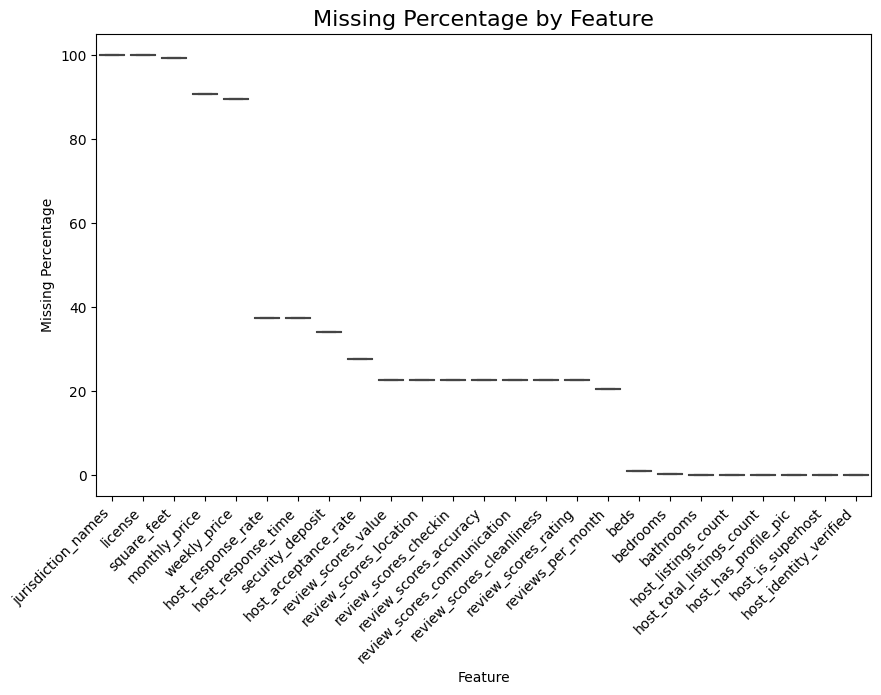

In [32]:
# Q3
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Missing Percentage', data=df1)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Percentage by Feature', fontsize=16)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [34]:
# Q4
missing_beds_data = df[df['beds'].isnull()].head(5)
missing_beds_data

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [35]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [36]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

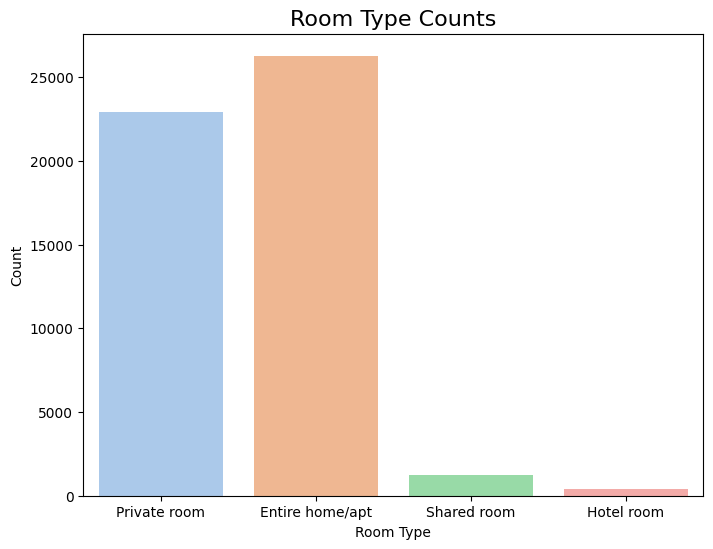

In [39]:
# Q5
room_type_counts = df['room_type'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df, palette='pastel')
plt.title('Room Type Counts', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

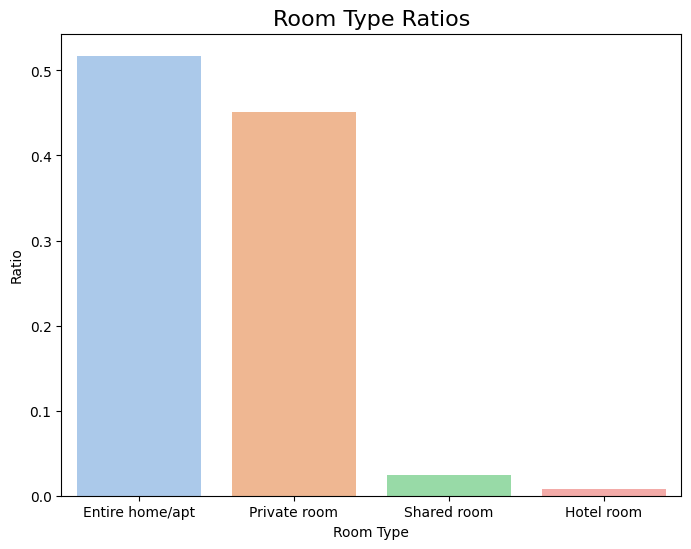

In [40]:
# Q6
room_type_ratios = df['room_type'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_ratios.index, y=room_type_ratios.values, palette='pastel')  # pastel 팔레트 사용
plt.title('Room Type Ratios', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Ratio')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

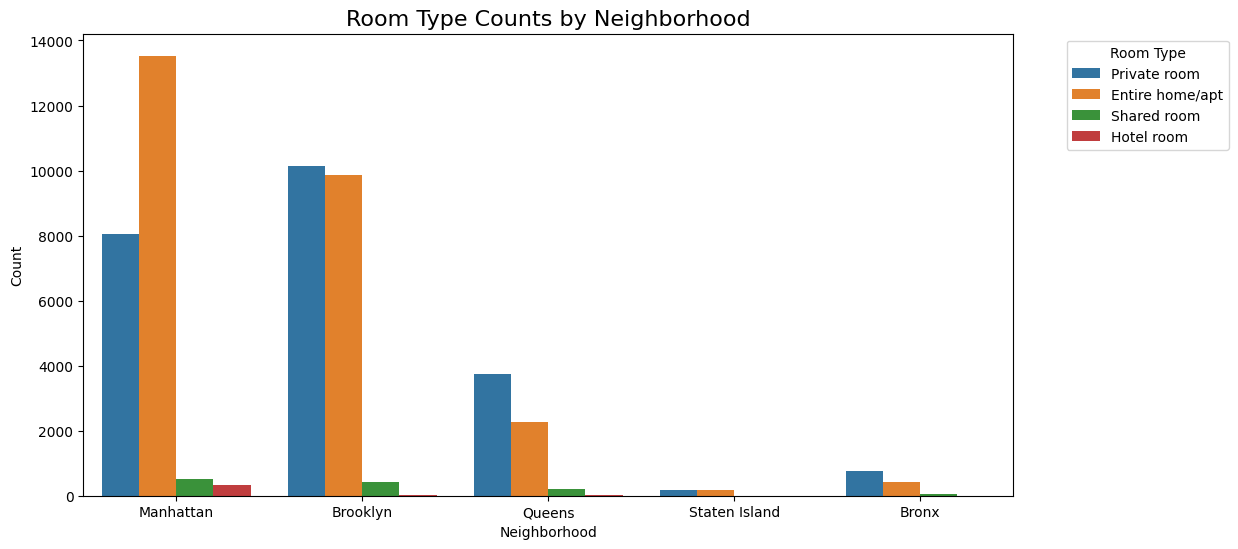

In [44]:
# Q7
room_type_counts_by_neighborhood = df.groupby(['neighborhood', 'room_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.countplot(x='neighborhood', hue='room_type', data=df)
plt.title('Room Type Counts by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<ipython-input-45-74acf0334088>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='neighborhood', y='price', data=df, palette='Pastel1', jitter=True, size=8)


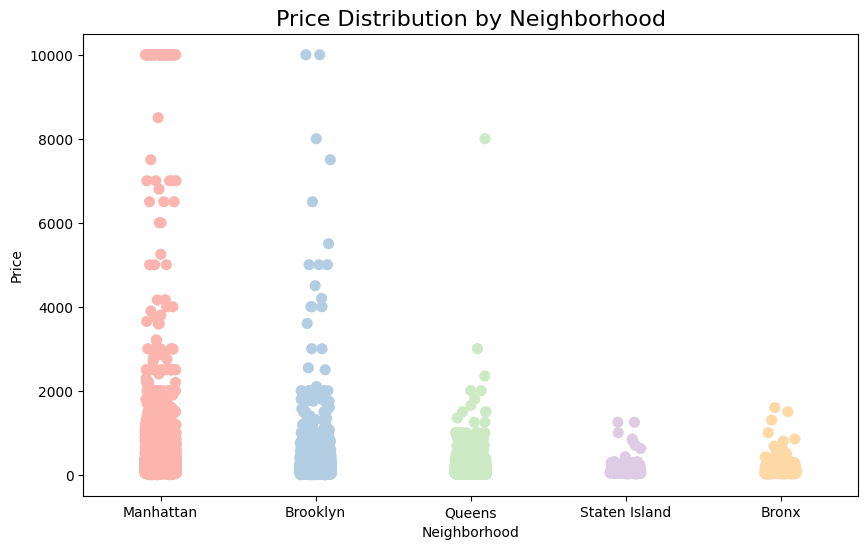

In [45]:
# Q8
plt.figure(figsize=(10, 6))
sns.stripplot(x='neighborhood', y='price', data=df, palette='Pastel1', jitter=True, size=8)
plt.title('Price Distribution by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9

Manhattan 에는 가족이나 연봉이 높은 사람이 많이 산다. Entire home/apt의 비율이 높고 아파트가격이 비싸다.


---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

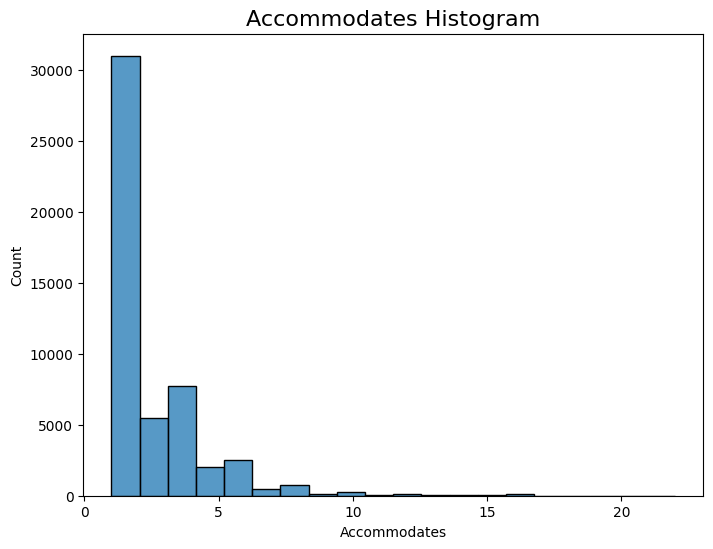

In [52]:
# Q10
plt.figure(figsize=(8, 6))
sns.histplot(df['accommodates'], bins=20, kde=False)
plt.title('Accommodates Histogram', fontsize=16)
plt.xlabel('Accommodates')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

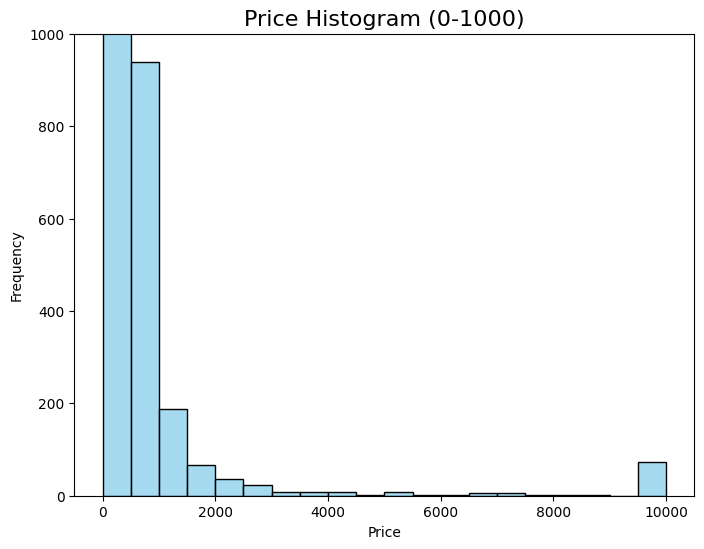

In [54]:
# Q11
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, kde=False, color='skyblue')
plt.title('Price Histogram (0-1000)', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ylim([0, 1000])
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [85]:
df = pd.read_csv('drive/MyDrive/airbnb_listings.csv', index_col=0)

<ipython-input-85-25e35331674a>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [86]:
#Q12
missing_percentage = df.isnull().sum() / len(df) * 100

# 25% 이상인 column 제거
columns_to_drop = missing_percentage[missing_percentage >= 25].index
df = df.drop(columns=columns_to_drop)

# 10% 이상 25% 미만인 경우 해당 row 제거 (문자열이 있는 경우도 포함)
for col in df.columns:
    if 10 <= missing_percentage[col] < 25:
        df = df[df[col].notna()]

for col in df.columns:
    if df[col].dtype != 'O' and missing_percentage[col] < 10:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# 문자열이 있는 column은 삭제
for col in df.columns:
    if df[col].dtype == 'O' and missing_percentage[col] < 10:
        df = df[df[col].notna()]

# 결과 확인
df


,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,f,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60,1,$30.00,29,730,t,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,t,Villa,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",39,1,$0.00,1,1125,t,28,58,88,88,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,moderate,f,f,1.00
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Smoking allowed"",""Smoke detecto...",80,1,$0.00,2,21,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,flexible,f,f,1.00
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,""Smok...",55,2,$100.00,1,1125,t,0,23,53,328,2,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,2.00
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,t,Condominium,Entire home/apt,3,1.5,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,""S...",180,1,$0.00,21,1125,t,28,58,88,363,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,1.00


In [87]:
df.isnull().sum()

id                                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_verifications                  0
host_has_profile_pic                0
host_identity_verified              0
neighborhood                        0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_30                     0
availability

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


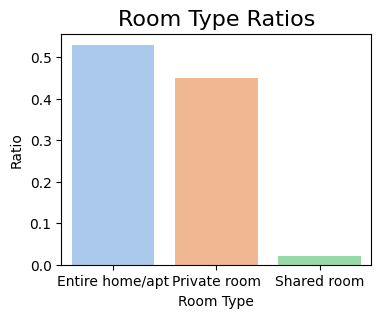

In [89]:
#Q13-1)
#room type 중 hotel room을 삭제
#Hotel room은 차지하는 비율이 굉장히 낮고, Manhattan에만 대부분 있으므로 특별히 유용한 데이터같지는 않다.
#같은 맥락에서 Shared room도 상대적으로 비율이 굉장히 낮으나, 하나의 neighborhood에만 있는 것도 아니고 어떤 목적으로 해당 데이터를 사용하는지에 따라 필요할 지도 몰라 남겼다.
df = df[df['room_type'] != 'Hotel room']

room_type_ratios = df['room_type'].value_counts(normalize=True)

plt.figure(figsize=(4, 3))
sns.barplot(x=room_type_ratios.index, y=room_type_ratios.values, palette='pastel')  # pastel 팔레트 사용
plt.title('Room Type Ratios', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Ratio')
plt.show()

In [90]:
#Q13-2)
#t,f를 1,0으로 치환
#문자열로 존재할 필요가 없으므로 데이터분석에 용이하게 INT 정수로 바꿔준다.
df.replace({'t': 1, 'f': 0}, inplace=True)
df.head(5)

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,0,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1,1,Manhattan,40.75362,-73.98377,0,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225,1,$0.00,7,1125,1,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0,0,strict_14_with_grace_period,1,1,0.38
2,3831,0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",1,1,Brooklyn,40.68514,-73.95976,1,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89,1,$0.00,1,730,1,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,0,0,0,moderate,0,0,4.71
3,5099,0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,0,Manhattan,40.74767,-73.97500,0,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,2,$100.00,3,21,1,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0,0,moderate,1,1,0.59
4,5114,0,3.0,3.0,"['email', 'phone', 'reviews']",1,0,Manhattan,40.71910,-73.99040,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",94,1,$13.00,1,730,1,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,0.56
5,5121,0,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,0,Brooklyn,40.68688,-73.95596,0,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60,1,$30.00,29,730,1,30,60,90,365,50,1,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,0,0,strict_14_with_grace_period,0,0,0.38


In [95]:
#Q13-3)
#price per accomodate를 한다
#에어비엔비를 사용할 때는 보통 1인당 가격을 계산하여 여행경비에 추가하곤 하는 개인적 경험을 통해 어떤 지역의 숙소 가격이 높은지를 알아보고자했다.
#기존과 비슷하지만, Manhattan과 Brooklyn이 유사했는데 해당 그래프에서는 보다 낮은 가격대를 형성하고 있음을 알 수 있다.
#또한 기존에는 이상치로 판단하기 애매했던 Manhattan에서의 price 10000 에 해당하는 row의 수가 확연히 줄었고, 아래의 그래프에서 확인 가능한 해당 row는
#엄청 비싼 숙소이거나 아니면 이상치로 보인다.
df['price_per_accommodate'] = df['price'] / df['accommodates']


<ipython-input-94-87d594ed86e6>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='neighborhood', y='price_per_accommodate', data=df, palette='Pastel1', jitter=True, size=8)


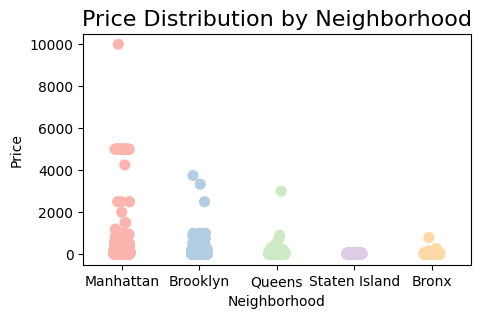

In [94]:
plt.figure(figsize=(5, 3))
sns.stripplot(x='neighborhood', y='price_per_accommodate', data=df, palette='Pastel1', jitter=True, size=8)
plt.title('Price Distribution by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
